In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [3]:
#Read Data
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['movies.csv']))

In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,6/13/1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,7/2/1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,6/20/1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,7/2/1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,7/25/1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
#Find mising data

for col in df.columns:
  pct_missing=np.mean(df[col].isnull())
  print('{}-{}%'.format(col,pct_missing))



name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [7]:
#Deleting missing values
df=df.dropna(axis=0,subset=['rating'])
df=df.dropna(axis=0,subset=['released'])
df=df.dropna(axis=0,subset=['score'])
df=df.dropna(axis=0,subset=['votes'])
df=df.dropna(axis=0,subset=['writer'])
df=df.dropna(axis=0,subset=['star'])
df=df.dropna(axis=0,subset=['country'])
df=df.dropna(axis=0,subset=['budget'])
df=df.dropna(axis=0,subset=['gross'])
df=df.dropna(axis=0,subset=['company'])
df=df.dropna(axis=0,subset=['runtime'])

In [8]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
#Datatype change for cols

df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [10]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,6/13/1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,7/2/1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,6/20/1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,7/2/1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,7/25/1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [11]:
#Create Correct Year column
df['yearrcorrect']=df['released'].astype('datetime64[ns]')

In [12]:
df['yearrcorrect']=pd.DatetimeIndex(df['yearrcorrect']).year

In [13]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearrcorrect
0,The Shining,R,Drama,1980,6/13/1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,7/2/1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,6/20/1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,7/2/1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,7/25/1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [15]:
df.sort_values(by=['gross'],inplace=False,ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearrcorrect
5445,Avatar,PG-13,Action,2009,12/18/2009,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,4/26/2019,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,12/19/1997,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,12/18/2015,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,4/27/2018,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [16]:
pd.set_option('display.max_rows',None)

In [18]:
#Remove Duplicates
df['company'].drop_duplicates().sort_values(ascending=False).head()

7129        thefyzz
5664    micro_scope
4007       i5 Films
6793     i am OTHER
6420           erbp
Name: company, dtype: object

In [ ]:
#correlation 


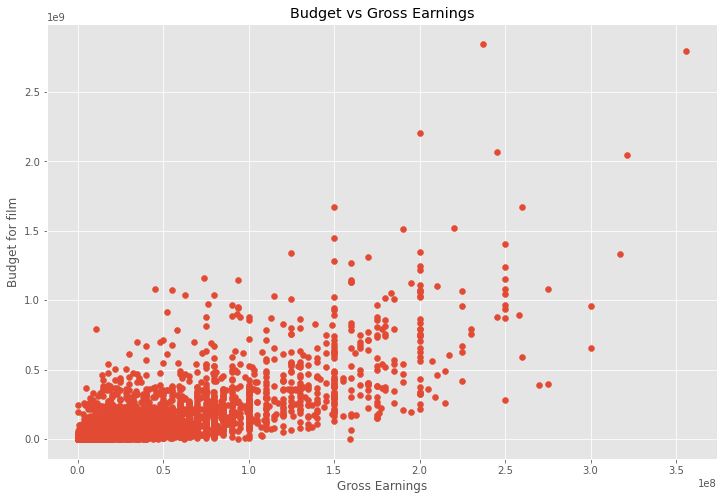

In [19]:
#scatter plot with budget vs gross
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')
plt.show()

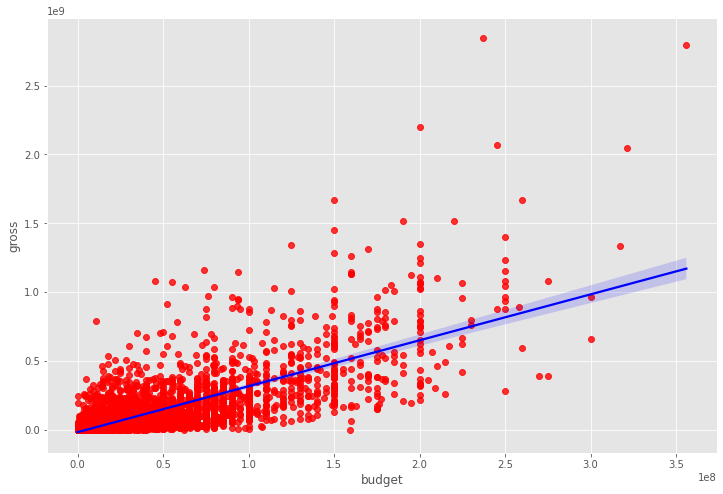

In [20]:
#Regrssion Plot using seaborn

sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":'red'},line_kws={"color":"blue"})

In [21]:
#Correlation between them
df.corr()

,year,score,votes,budget,gross,runtime,yearrcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.970298
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061248
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.200154
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.313917
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.263048
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075538
yearrcorrect,0.970298,0.061248,0.200154,0.313917,0.263048,0.075538,1.000000


In [22]:
#high correlation between Budget and Gross

<function matplotlib.pyplot.show>

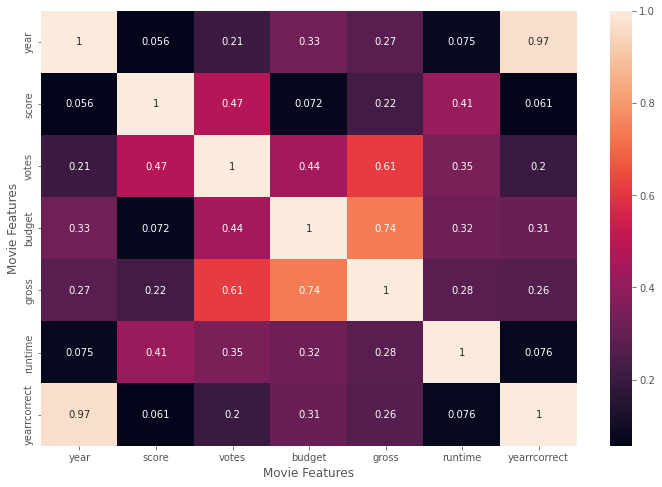

In [23]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title=("Correlation Matrix for Numeric features")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [24]:
df_numerized=df

for cols in df_numerized.columns:
  if(df_numerized[cols].dtype=='object'):
    df_numerized[cols]=df_numerized[cols].astype('category')
    df_numerized[cols]=df_numerized[cols].cat.codes

In [25]:
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearrcorrect
0,4692,6,6,1980,1547,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1980,1829,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1980,1597,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1980,1829,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1980,1872,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1980


<function matplotlib.pyplot.show>

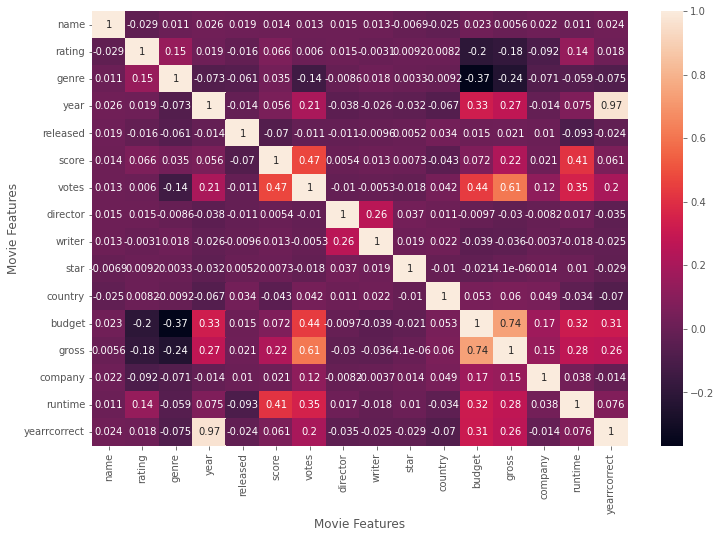

In [26]:
correlation_matrix=df_numerized.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title=("Correlation Matrix for Numeric features")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [27]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearrcorrect
name,1.000000,-0.029234,0.010996,0.025542,0.019105,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.023955
rating,-0.029234,1.000000,0.147796,0.019499,-0.016234,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.017880
genre,0.010996,0.147796,1.000000,-0.073167,-0.060558,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.074979
year,0.025542,0.019499,-0.073167,1.000000,-0.013504,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.970298
released,0.019105,-0.016234,-0.060558,-0.013504,1.000000,-0.069969,-0.011432,-0.010706,-0.009602,0.005202,0.034410,0.015439,0.020808,0.010305,-0.092509,-0.024320
score,0.014450,0.065983,0.035106,0.056386,-0.069969,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061248
votes,0.012615,0.006031,-0.135990,0.206021,-0.011432,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.200154
director,0.015246,0.014656,-0.008553,-0.038354,-0.010706,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.035017
writer,0.012880,-0.003149,0.017578,-0.025908,-0.009602,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.025029
star,-0.006882,0.009196,0.003341,-0.032157,0.005202,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.029053


In [28]:
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

name          name            1.000000
              rating         -0.029234
              genre           0.010996
              year            0.025542
              released        0.019105
              score           0.014450
              votes           0.012615
              director        0.015246
              writer          0.012880
              star           -0.006882
              country        -0.025490
              budget          0.023392
              gross           0.005639
              company         0.021697
              runtime         0.010850
              yearrcorrect    0.023955
rating        name           -0.029234
              rating          1.000000
              genre           0.147796
              year            0.019499
              released       -0.016234
              score           0.065983
              votes           0.006031
              director        0.014656
              writer         -0.003149
              star       

In [29]:
sorted_pairs=corr_pairs.sort_values()

In [30]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes         gross           0.614751
gross         votes           0.614751
budget        gross           0.740247
gross         budget          0.740247
year          yearrcorrect    0.970298
yearrcorrect  year            0.970298
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
yearrcorrect  yearrcorrect    1.000000
dtype: float64

In [ ]:
#Votes and budget have the highest correlation to gross earnings